 Best-Fit Parameters:  [  9.46967286e-06   9.64781018e-01   9.06948533e-01]


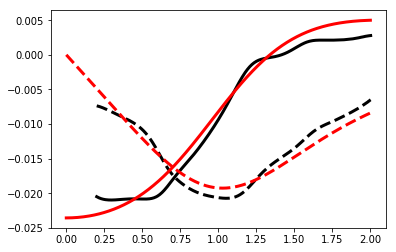

In [7]:
#Prashant's Faraday rotation fitting for single Cyclotron resonance peak shifting in magnetic field--WORKS---InAs- Full structure
#Note to self: Probably due to too many variables there are issues with the exctracting correct parameters.
#need ot fix some variables
from scipy.optimize import leastsq
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import time
start_time = time.time()
path = 'F:\\FS\\M19_M21_NEW\\'
name = 'm19_repeat'
append = '.txt'
filename = path + name +append

Pi =3.1415926
a = 9.97e-06
e0 = 8.85*2*Pi
alp = 0
#1.972e-05
def funf1(beta,x):
#    fun = -(e0*beta[0]*a)/(e0*a*(beta[1] - 1j*x) + (0.01202 - 1j*e0*alp*x)*(beta[1]**2 + beta[0]**2 - x**2 - 2*1j*beta[1]*x))
    fun = -(e0*beta[0]*beta[1])/(e0*beta[0]*(beta[2] - 1j*x) + (0.01202- 1j*e0*(beta[3])*x)*(beta[2]**2 + beta[1]**2 - x**2 - 2*1j*beta[2]*x))
    return fun.real

def funf2(beta,x):
#    fun = -(e0*beta[0]*a)/(e0*a*(beta[1] - 1j*x) + (0.01202 - 1j*e0*alp*x)*(beta[1]**2 + beta[0]**2 - x**2 - 2*1j*beta[1]*x))
    fun = -(e0*beta[0]*beta[1])/(e0*beta[0]*(beta[2] - 1j*x) + (0.01202- 1j*e0*(beta[3])*x)*(beta[2]**2 + beta[1]**2 - x**2 - 2*1j*beta[2]*x))
    return fun.imag

def residual_two_functions(beta, x, y1, y2):
#    fun = -(e0*beta[0]*a)/(e0*a*(beta[1] - 1j*x) + (0.01202 - 1j*e0*alp*x)*(beta[1]**2 + beta[0]**2 - x**2 - 2*1j*beta[1]*x))
    fun = -(e0*beta[0]*beta[1])/(e0*beta[0]*(beta[2] - 1j*x) + (0.01202 - 1j*e0*(beta[3])*x)*(beta[2]**2 + beta[1]**2 - x**2 - 2*1j*beta[2]*x))
    fun1 = fun.real
    fun2 = fun.imag
    diff1 = y1 - fun1
    diff2 = y2 - fun2
    k=0
    for k in range(1,360):
        if k==10:
            diff1[k] = (y1[k] - fun1[k])*1
            diff2[k] = (y2[k] - fun2[k])*1
        else:
            diff1[k] = (y1[k] - fun1[k])
            diff2[k] = (y2[k] - fun2[k])
        return np.concatenate((diff1, diff2))

#field re# =01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,
#file has 0=02,04,06,08,10,12,14,16,18,20,22,24,26,28,30 So 5kG is y1=6,y2=27
#field im# =16,17,18,19,20,21,22,23,24,25,26,27,28,29,30.31,32,33,34,35,36
data = pd.read_csv(filename,delimiter="\t",header=None, usecols=range(0,30),dtype=np.float32)
data_array = np.array(data.values)
x = data_array[:,0]
y1 = data_array[:,8]
y2 = data_array[:,25]
# initial values. Fitted values stored in best
beta_init =np.array([9.97E-06,0.5, 0.6,2.5E-05])
best, cov, info, message, ier = leastsq(residual_two_functions,beta_init, args=(x, y1, y2),full_output=True)
print(" Best-Fit Parameters: ",  best)

save_x = np.linspace(0,2,num=370)
save_y1 = funf1(best,save_x)
save_y2 = funf2(best,save_x)
data_fit =pd.DataFrame({'Freq_fit' : pd.Series(save_x), 'Real' : pd.Series(save_y1 ),'Imag' : pd.Series(save_y2)})
savepath =path + '0kG' +append
data_fit.to_csv(savepath,sep='\t',mode = 'w', index=False)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
plt.plot(x, y1, linewidth=3, color='k')
plt.plot(x, y2, linewidth=3, color='k',linestyle='dashed')
plt.plot(save_x, save_y1, linewidth=3, color='r')
plt.plot(save_x, save_y2, linewidth=3, color='r',linestyle='dashed')
plt.show()

In [ ]:
2kG:[  2.28703566e-04   3.18349944e-03   2.94032451e-01   2.34369173e-04]
3kG:[  1.34942516e-04   1.17703992e-02   3.86662019e-01  -3.26837510e-05]
4kG:[  1.76845877e-04   1.44698621e-02   4.15677307e-01  -2.45213519e-05]
5kG:[  8.30797428e-05   3.61916268e-02   5.75524234e-01  -2.57548728e-05]
6kG:[  9.16151691e-06   3.37614470e-01   6.49124645e-01  -3.59763103e-05]
8kG:[  7.51398798e-06   5.61002838e-01   6.47645148e-01  -3.83006012e-05]
10kG:[  7.52524866e-06   7.50575016e-01   6.76695866e-01  -3.71745860e-05]
12kG:[  7.43952967e-06   9.29041453e-01   6.85978870e-01  -3.76769119e-05]
14kG:[  6.93622679e-06   1.08825302e+00   6.47421199e-01  -4.99836071e-05]
16kG:[  7.19403570e-06   1.28115797e+00   6.66940079e-01  -4.23197962e-05]
18kG:[  7.13902134e-06   1.45194317e+00   6.47663449e-01  -4.85838249e-05]
20kG:[  7.12422901e-06   1.62470040e+00   6.23518079e-01  -4.76010386e-05]
22kG:[  6.67215208e-06   1.71765089e+00   5.73189670e-01  -6.44795617e-05]
24kG:[  6.69031955e-06   1.86004806e+00   5.67601725e-01  -6.09026296e-05]
26kG:[  6.72084877e-06   1.99233377e+00   5.58536992e-01  -5.99466769e-05]
28kG:[  6.62976393e-06   2.04549492e+00   5.41532937e-01  -8.23774411e-05]
30kG:[  6.37719203e-06   2.12603147e+00   5.18174929e-01  -7.44904317e-05]
--------------------------------alpha_inf*d = 0-----------------------------
2kG:[  1.13408545e-06   3.13054407e-01   3.47044171e-01]
3kG:[  1.89289023e-04   9.24872556e-03   3.53160786e-01]
4kG:[  2.36650333e-04   1.19110268e-02   3.81966513e-01]
5kG:[  1.83379390e-04   1.89918147e-02   4.81059652e-01]
6kG:[  5.57312678e-05   6.96423134e-02   7.19305283e-01]
8kG:[  1.14061868e-05   4.76792193e-01   8.39252795e-01]
10kG:[  1.01775071e-05   7.28152994e-01   8.91968671e-01]
12kG:[  9.47013972e-06   9.64767903e-01   9.06985246e-01]
14kG:[  8.79100863e-06   1.19943395e+00   9.04069632e-01]
16kG:[  8.62965976e-06   1.42979178e+00   8.73928435e-01]
18kG:[  8.62238775e-06   1.67616972e+00   8.62745559e-01]
20kG:[  8.40607328e-06   1.88900501e+00   7.85738509e-01]
22kG:[  8.15255332e-06   2.10986290e+00   7.43408457e-01]
24kG:[  8.00764656e-06   2.27842716e+00   6.51693503e-01]
26kG:[  7.94866125e-06   2.44419565e+00   5.51734444e-01]
28kG:[  8.55471942e-06   2.78842530e+00   4.36488067e-01]
30kG:[  7.79402802e-06   2.74267036e+00   3.35695385e-01]
-----------------------------(wp/2pi)^2d = 9.97E-06-----------------------------
2kG:[ 0.04425246  0.44496443]
3kG:[ 0.14141581  0.59145579]
4kG:[ 0.21218212  0.6450696 ]
5kG:[ 0.28063205  0.67988864]
6kG:[ 0.34591426  0.7159978 ]
8kG:[ 0.52316499  0.80168479]
10kG:[ 0.73576405  0.88188014]
12kG:[ 0.94784566  0.94164395]
14kG:[ 1.16891675  1.00943662]
16kG:[ 1.41443497  1.01043287]
18kG:[ 1.68831845  1.01335613]
20kG:[ 1.93867319  0.9628879 ]
22kG:[ 2.22577912  0.95775557]
24kG:[ 2.45469437  0.86870104]
26kG:[ 2.6849516   0.75057268]
28kG:[ 3.0319417   0.53456907]
30kG:[ 3.14646795  0.46609176]
--------------------------------alpha_inf*d = 1.97e-05-----------------------------
2kG:
3kG:
4kG:
5kG:
6kG:
8kG:
10kG:
12kG:
14kG:
16kG:
18kG:
20kG:
22kG:
24kG:
26kG:
28kG:
30kG:



In [ ]:
#Faraday rotation fitting for TWO Cyclotron resonance peak shifting in magnetic field--WORKS---InAs- Full structure
#Note to self: Probably due to too many variables there are issues with the exctracting correct parameters.
#need ot fix some variables
   # this is a template for a single fit of a complex fucntion
   # data provided. data stored in a three column text file, namely frequency, real, imag parts of the response function
#path = 'F:\\OneDrive - Johns Hopkins University\\Project\\thz\\2DEG_InAlAs_InGaAs'
from scipy.optimize import leastsq
import numpy as np
from math import pi
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import time
start_time = time.time()

path = 'F:\\FS\\M19_M21_NEW\\'
name = 'm19'
append = '.txt' 
filename = path + name +append


# 0.01194 = (n+1)/Z_0 where n=3.51 and Z_0=377
#a=2.49e-05
#alp = 1.5e-04
Pi = pi
e0 = 8.85*2*Pi
def funf1(beta,x):
    m1 = (beta[0]**2 + beta[1]**2 - x**2 - 2*1j*beta[0]*x)
    m2 = (beta[2]**2 + beta[3]**2 - x**2 - 2*1j*beta[2]*x)
    fun = -e0*(beta[4]*beta[1]*m2 + beta[5]*beta[3]*m2)/(e0*(beta[4]*(beta[0] - 1j*x)*m2 + beta[5]*(beta[2] - 1j*x)*m1) + (0.01194 - 1j*x*e0*beta[6])*m1*m2)
    return fun.real

def funf2(beta,x):
    m1 = (beta[0]**2 + beta[1]**2 - x**2 - 2*1j*beta[0]*x)
    m2 = (beta[2]**2 + beta[3]**2 - x**2 - 2*1j*beta[2]*x)
    fun = -e0*(beta[4]*beta[1]*m2 + beta[5]*beta[3]*m2)/(e0*(beta[4]*(beta[0] - 1j*x)*m2 + beta[5]*(beta[2] - 1j*x)*m1) + (0.01194 - 1j*x*e0*beta[6])*m1*m2)
    return fun.imag
                         
def residual_two_functions(beta, x, y1, y2):
    m1 = (beta[0]**2 + beta[1]**2 - x**2 - 2*1j*beta[0]*x)
    m2 = (beta[2]**2 + beta[3]**2 - x**2 - 2*1j*beta[2]*x)
    fun = -e0*(beta[4]*beta[1]*m2 + beta[5]*beta[3]*m2)/(e0*(beta[4]*(beta[0] - 1j*x)*m2 + beta[5]*(beta[2] - 1j*x)*m1) + (0.01194 - 1j*x*e0*beta[6])*m1*m2)
    fun1 = fun.real
    fun2 = fun.imag
    diff1 = y1 - fun1
    diff2 = y2 - fun2
    k=0
    for k in range(0,95):
        if k==35:
            diff1[k] = (y1[k] - fun1[k])
            diff2[k] = (y2[k] - fun2[k])
        else:
            diff1[k] = (y1[k] - fun1[k])
            diff2[k] = (y2[k] - fun2[k])
    return np.concatenate((diff1, diff2))

data = pd.read_csv(filename,delimiter="\t",header=None, usecols=range(0,19),dtype=np.float32)
data_array = np.array(data.values)
x = data_array[:,0]
y1 = data_array[:,4]
y2 = data_array[:,21]
# initial values. Fitted values stored in best[0.3,  0.5130451, 0.3, 0.8, 0.0000197, 0.00005]
beta_init =np.array([0.458, 0.75, 0, 0,  5.305615343e-05,0, 9.5e-05])
best, cov, info, message, ier = leastsq(residual_two_functions,
                                       beta_init, args=(x, y1, y2),
                                        full_output=True)
print(" Best-Fit Parameters: ",  best)

def ftest1(bet,x):
    a = 3.65e-06
    alp = 9.5e-05
    fun = -(e0*a*bet[0])/(e0*a*(bet[1] - 1j*x) + (0.01194 - 1j*e0*alp*x)*(bet[1]**2 + bet[0]**2 - x**2 - 2*1j*bet[1]*x))
    return fun.real
def ftest2(beu,x):
    a = 3.65e-06
    alp = 9.5e-05
    fun = -(e0*a*beu[0])/(e0*a*(beu[1] - 1j*x) + (0.01194 - 1j*e0*alp*x)*(beu[1]**2 + beu[0]**2 - x**2 - 2*1j*beu[1]*x))
    return fun.real
#1.24558527, 0.45485014
bet = np.array([ 0.925, 0.43785379])
beu = np.array([ 1.15, 0.422485014])

#save fitted data to file
save_x = np.linspace(0,2,num=200)
save_y1 = funf1(best,save_x)
save_y2 = funf2(best,save_x)  
save_yt1 = ftest1(bet,save_x)
save_yt2 = ftest2(beu,save_x)
save_yt3 = save_yt1 + save_yt2
data_fit =pd.DataFrame({'Freq_fit' : pd.Series(save_x), 'Real' : pd.Series(save_y1 ),'Imag' : pd.Series(save_y2)})       
savepath =path + '5kG' +append                                            
data_fit.to_csv(savepath,sep='\t',mode = 'w', index=False)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
plt.plot(x, y1, linewidth=3, color='k')
plt.plot(x, y2, linewidth=3, color='k',linestyle='dashed')
plt.plot(save_x, save_y1, linewidth=3, color='r')
plt.plot(save_x, save_y2, linewidth=3, color='r',linestyle='dashed')
#plt.plot(save_x, save_yt1, linewidth=2, color='g')
#plt.plot(save_x, save_yt2, linewidth=2, color='m')
plt.plot(save_x, save_yt3, linewidth=2, color='m')
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))